## Linear Regression.
### 1. Load data.
### 2. Selects features.
### 3. split data train-val-test.
### 4. Training.

----
### 1. Load data.
- load data và kèm một số thư viện cơ bản.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [3]:
data = pd.read_csv('../data/processed/dataset.csv')

----
### 2. Selects features.
- Chọn các đặc trưng hỗ trợ cho việc training.

In [9]:
features = ['overall',
 'potential','age','height_cm','weight_kg','league_rank','pace','shooting',
 'passing','dribbling','defending','physic','gk_diving','gk_handling','gk_kicking',
 'gk_reflexes','gk_speed','gk_positioning','attacking_crossing','attacking_finishing',
 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling',
 'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control',
 'movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions',
 'movement_balance','power_shot_power','power_jumping','power_stamina',
 'power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
 'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
 'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
 'goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes','wage_eur']
target = ['value_eur']

data['wage_eur'] = data['wage_eur'] / 1000
data['value_eur'] = data['value_eur'] / 1000000
# phân chia features (X) and target (y)
X = data[features]
y = data[target]

----
### 3. Split data train-val-test.
- Train : 70% 
- Val : 15%
- Test : 15%

In [10]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập tạm thời (bao gồm tập validation và tập kiểm tra)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Chia tập tạm thời thành tập validation và tập kiểm tra
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

----
### 4. training.
- Các hàm đánh giá : MSE, MAE, R2, Cross Validation Score
- hình vẽ Residual plot đánh giá khu vực xuất hiện nhiều lỗi.

#### a. baseline.

Model evaluation for linear regression
score Train R2: 0.8404351949151274,score Validation R2: 0.8332139504332134,score Test R2: 0.8254639491291416
Cross Validation Score: [0.81264681 0.85273053 0.82558359 0.77188151 0.78528818], Mean of Cross Validation Score: 0.8096261238194682
Train MSE: 10.997952339779921, Validation MSE: 11.224272988313983, Test MSE: 11.789818242485897


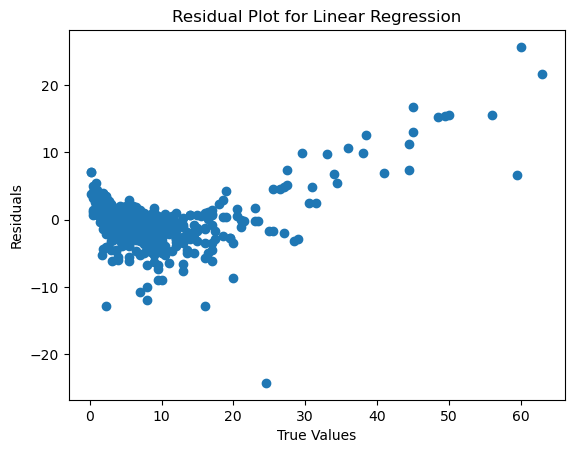

Checking for overfitting/underfitting:
Train vs Validation MSE: 10.997952339779921 vs 11.224272988313983
Train vs Validation R2: 0.8404351949151274 vs 0.8332139504332134


In [11]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# đánh gía model.
print("Model evaluation for linear regression")

# tính điểm score
train_score_r2 = r2_score(y_train, y_train_pred)
test_score_r2 = r2_score(y_test, y_test_pred)
val_score_r2 = r2_score(y_val, y_val_pred)
cv_score = cross_val_score(model, X_val, y_val, cv=5)

# tính metrics
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"score Train R2: {train_score_r2},score Validation R2: {val_score_r2},score Test R2: {test_score_r2}")
print(f"Cross Validation Score: {cv_score}, Mean of Cross Validation Score: {cv_score.mean()}")
print(f"Train MSE: {train_mse}, Validation MSE: {val_mse}, Test MSE: {test_mse}")

# Residual plot 
plt.scatter(y_test, y_test - y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

# kiểm tra overfitting/underfitting
print("Checking for overfitting/underfitting:")
print("Train vs Validation MSE:", train_mse, "vs", val_mse)
print("Train vs Validation R2:", train_score_r2, "vs", val_score_r2)

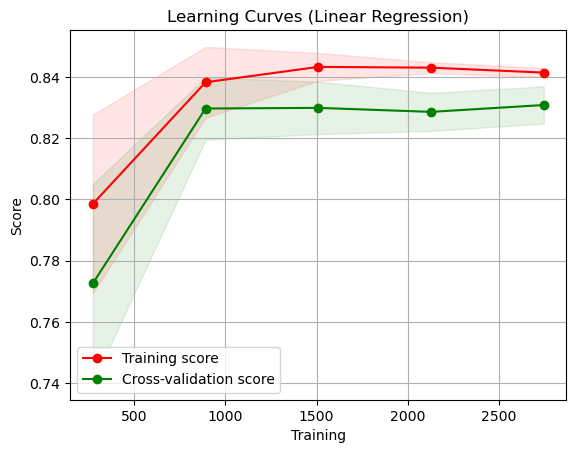

In [15]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = np.array(X_train), np.array(y_train)

title = "Learning Curves (Linear Regression)"
cv = 5
estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()


#### b. Chọn đặc trưng quan trọng với RFE.
- nhận xét khi chọn số đặc trưng ít hơn thì score sẽ có xu hương giảm và lỗi sẽ tăng.

số cột ban đầu: 52
score Train R2: 0.8351286901296624,score Validation R2: 0.8293664916129284,score Test R2: 0.8251527383831843
Cross Validation Score: [0.81264681 0.85273053 0.82558359 0.77188151 0.78528818], Mean of Cross Validation Score: 0.8096261238194666
Train MSE: 1.1363701457765658e-23, Validation MSE: 1.1483197090313793e-23, Test MSE: 1.1810840364343464e-23


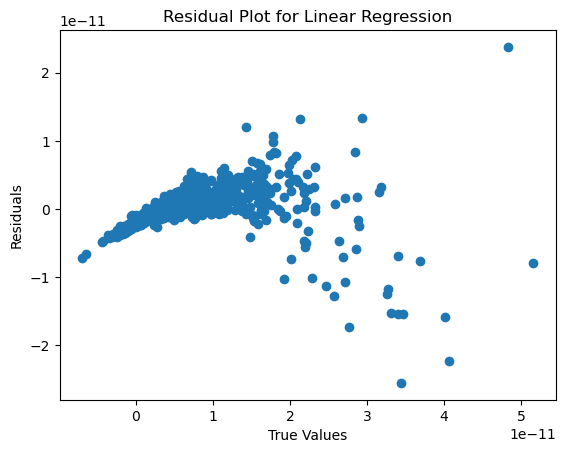

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

print(f"số cột ban đầu: {len(features)}")
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_val_rfe = rfe.transform(X_val)
X_test_rfe = rfe.transform(X_test)
model.fit(X_train_rfe, y_train)

# dự đoán.
y_train_pred = model.predict(X_train_rfe)
y_val_pred = model.predict(X_val_rfe)
y_test_pred = model.predict(X_test_rfe)

# tính điểm score
train_score_r2 = r2_score(y_train, y_train_pred)
test_score_r2 = r2_score(y_test, y_test_pred)
val_score_r2 = r2_score(y_val, y_val_pred)
cv_score = cross_val_score(model, X_val, y_val, cv=5)

# tính metrics
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"score Train R2: {train_score_r2},score Validation R2: {val_score_r2},score Test R2: {test_score_r2}")
print(f"Cross Validation Score: {cv_score}, Mean of Cross Validation Score: {cv_score.mean()}")
print(f"Train MSE: {train_mse}, Validation MSE: {val_mse}, Test MSE: {test_mse}")

# Residual plot
plt.scatter(y_test_pred, y_test_pred - y_test)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

#### c. Hồi quy ride và hồi quy lasso.
- với baseline như trên có vẻ mô hình của chúng ta không overfitting. 
- ride và lasso là 2 kĩ thuật ngăn chặn overfitting.
- tôi sẽ thử với dữ liệu này với alpha=0.1.

##### lasso.

Model evaluation for Lasso regression
score Train R2: 0.8381600440154385,score Validation R2: 0.8322608540432398,score Test R2: 0.824566027670381
Cross Validation Score: [0.8133706  0.85992012 0.84127237 0.77577924 0.79247757], Mean of Cross Validation Score: 0.8165639828726841
Train MSE: 11.154766376229103, Validation MSE: 11.288413928716539, Test MSE: 11.850472363751926


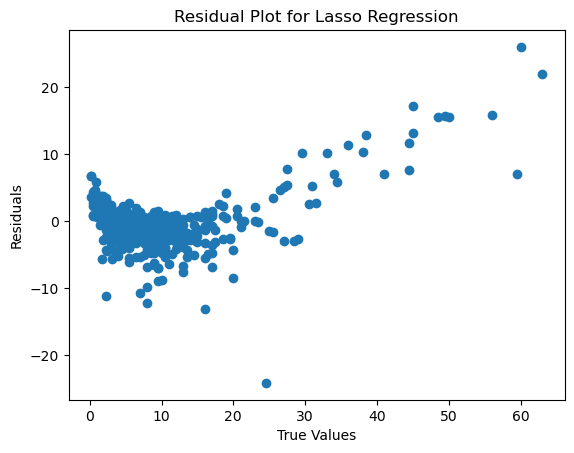

In [38]:
from sklearn.linear_model import Lasso

# Train model
lasso_model = Lasso(alpha=0.1) # alpha is the regularization parameter
lasso_model.fit(X_train, y_train)

# Make predictions
y_train_pred = lasso_model.predict(X_train)
y_val_pred = lasso_model.predict(X_val)
y_test_pred = lasso_model.predict(X_test)

# Evaluate model
print("Model evaluation for Lasso regression")

# Compute R2 score
train_score_r2 = r2_score(y_train, y_train_pred)
test_score_r2 = r2_score(y_test, y_test_pred)
val_score_r2 = r2_score(y_val, y_val_pred)
cv_score = cross_val_score(lasso_model, X_val, y_val, cv=5)

# Compute MSE
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"score Train R2: {train_score_r2},score Validation R2: {val_score_r2},score Test R2: {test_score_r2}")
print(f"Cross Validation Score: {cv_score}, Mean of Cross Validation Score: {cv_score.mean()}")
print(f"Train MSE: {train_mse}, Validation MSE: {val_mse}, Test MSE: {test_mse}")

# Residual plot 
plt.scatter(y_test.values.ravel(), y_test.values.ravel() - y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Lasso Regression')
plt.show()


##### ride.

Model evaluation for Ridge regression
score Train R2: 0.840435194760771,score Validation R2: 0.8332142545297153,score Test R2: 0.8254639181844393
Cross Validation Score: [0.81264702 0.8527372  0.82560795 0.77187848 0.78530275], Mean of Cross Validation Score: 0.809634680545873
Train MSE: 10.99795235041889, Validation MSE: 11.224252523400036, Test MSE: 11.789820332784226


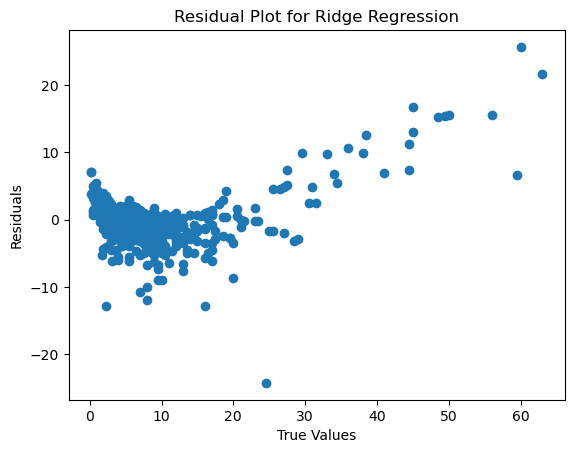

In [41]:
from sklearn.linear_model import Ridge

# Train model
ridge_model = Ridge(alpha=0.1) # alpha is the regularization parameter
ridge_model.fit(X_train, y_train)

# Make predictions
y_train_pred = ridge_model.predict(X_train)
y_val_pred = ridge_model.predict(X_val)
y_test_pred = ridge_model.predict(X_test)

# Evaluate model
print("Model evaluation for Ridge regression")

# Compute R2 score
train_score_r2 = r2_score(y_train, y_train_pred)
test_score_r2 = r2_score(y_test, y_test_pred)
val_score_r2 = r2_score(y_val, y_val_pred)
cv_score = cross_val_score(ridge_model, X_val, y_val, cv=5)

# Compute MSE
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"score Train R2: {train_score_r2},score Validation R2: {val_score_r2},score Test R2: {test_score_r2}")
print(f"Cross Validation Score: {cv_score}, Mean of Cross Validation Score: {cv_score.mean()}")
print(f"Train MSE: {train_mse}, Validation MSE: {val_mse}, Test MSE: {test_mse}")

# Residual plot 
plt.scatter(y_test, y_test - y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Ridge Regression')
plt.show()


#### PolynomialFeatures 

Linear Regression - Mean Squared Error: 5.154976711058016e-23
Linear Regression - R2 Score: 0.23685907706614218
Ridge Regression - Mean Squared Error: 5.161858388607246e-23
Ridge Regression - R2 Score: 0.23584031596388788
Lasso Regression - Mean Squared Error: 6.76968374424643e-23
Lasso Regression - R2 Score: -0.00218157910828487


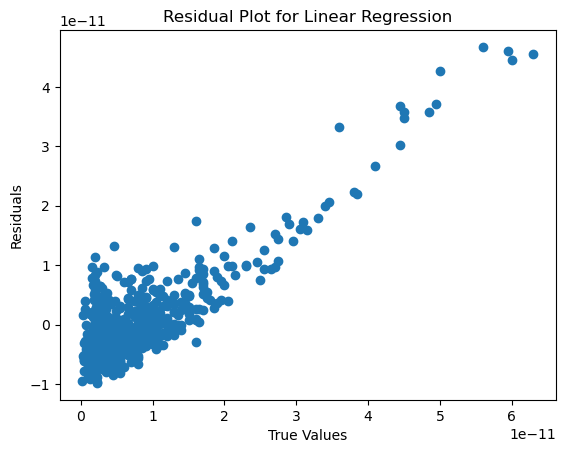

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np


# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Thêm các đặc trưng đa thức
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Chọn đặc trưng với RFE
lr_model = LinearRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_poly, y_train)
X_val_rfe = rfe.transform(X_val_poly)
X_test_rfe = rfe.transform(X_test_poly)

# Huấn luyện mô hình Linear Regression
lr_model.fit(X_train_rfe, y_train)
lr_y_pred = lr_model.predict(X_test_rfe)

# Đánh giá mô hình Linear Regression
mse_lr = mean_squared_error(y_test, lr_y_pred)
r2_lr = r2_score(y_test, lr_y_pred)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R2 Score: {r2_lr}")

# Huấn luyện mô hình Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_rfe, y_train)
ridge_y_pred = ridge_model.predict(X_test_rfe)

# Đánh giá mô hình Ridge Regression
mse_ridge = mean_squared_error(y_test, ridge_y_pred)
r2_ridge = r2_score(y_test, ridge_y_pred)
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R2 Score: {r2_ridge}")

# Huấn luyện mô hình Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_rfe, y_train)
lasso_y_pred = lasso_model.predict(X_test_rfe)

# Đánh giá mô hình Lasso Regression
mse_lasso = mean_squared_error(y_test, lasso_y_pred)
r2_lasso = r2_score(y_test, lasso_y_pred)
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R2 Score: {r2_lasso}")

# Residual plot
plt.scatter(y_test, y_test - lr_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()


Random Forest - Mean Squared Error: 2811497690974.8643
Random Forest - R2 Score: 0.9583786879557675


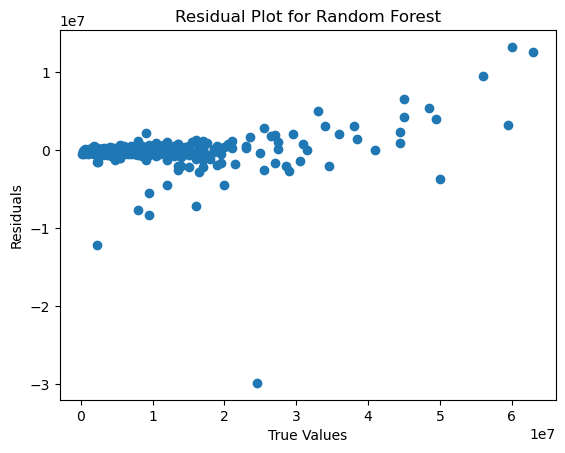

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Thử nghiệm với mô hình Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình Random Forest
rf_y_pred = rf_model.predict(X_test_scaled)

# Đánh giá mô hình Random Forest
mse_rf = mean_squared_error(y_test, rf_y_pred)
r2_rf = r2_score(y_test, rf_y_pred)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R2 Score: {r2_rf}")

# Vẽ đồ thị residual

plt.scatter(y_test.values.ravel(), y_test.values.ravel() - rf_y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.show()


In [6]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Random Search cho Ridge Regression
ridge_param_dist = {
    'alpha': uniform(0.1, 100),  # Uniform distribution từ 0.1 đến 100
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}
ridge_random_search = RandomizedSearchCV(estimator=Ridge(), param_distributions=ridge_param_dist,
                                        n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='r2', random_state=42)
ridge_random_search.fit(X_train_scaled, y_train.values.ravel())

# In ra các tham số tốt nhất cho Ridge
print(f"Best parameters for Ridge (Random Search): {ridge_random_search.best_params_}")

# Huấn luyện mô hình Ridge với tham số tốt nhất
best_ridge_random = ridge_random_search.best_estimator_
best_ridge_random.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình Ridge tối ưu
ridge_random_y_pred = best_ridge_random.predict(X_test_scaled)

# Đánh giá mô hình Ridge tối ưu
mse_ridge_random = mean_squared_error(y_test, ridge_random_y_pred)
r2_ridge_random = r2_score(y_test, ridge_random_y_pred)
print(f"Ridge Regression (Random Search) - Mean Squared Error: {mse_ridge_random}")
print(f"Ridge Regression (Random Search) - R2 Score: {r2_ridge_random}")

# Random Search cho Lasso Regression
lasso_param_dist = {
    'alpha': uniform(0.01, 100),  # Uniform distribution từ 0.01 đến 100
    'max_iter': [1000, 5000, 10000]
}
lasso_random_search = RandomizedSearchCV(estimator=Lasso(), param_distributions=lasso_param_dist,
                                        n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='r2', random_state=42)
lasso_random_search.fit(X_train_scaled, y_train.values.ravel())

# In ra các tham số tốt nhất cho Lasso
print(f"Best parameters for Lasso (Random Search): {lasso_random_search.best_params_}")

# Huấn luyện mô hình Lasso với tham số tốt nhất
best_lasso_random = lasso_random_search.best_estimator_
best_lasso_random.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình Lasso tối ưu
lasso_random_y_pred = best_lasso_random.predict(X_test_scaled)

# Đánh giá mô hình Lasso tối ưu
mse_lasso_random = mean_squared_error(y_test, lasso_random_y_pred)
r2_lasso_random = r2_score(y_test, lasso_random_y_pred)
print(f"Lasso Regression (Random Search) - Mean Squared Error: {mse_lasso_random}")
print(f"Lasso Regression (Random Search) - R2 Score: {r2_lasso_random}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[CV] END ..........alpha=37.55401188473625, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=37.55401188473625, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=46.02488919658672, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=46.02488919658672, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=18.44347898661638, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=46.02488919658672, solver=sparse_cg; total time=   0.0s
[CV] END ...........alpha=60.21150117432088, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=60.21150117432088, solver=cholesky; total time=   0.0s
[CV] END ...........alpha=60.21150117432088, solver=cholesky; total time=   0.0s
[CV] END ...............alpha=2.1584494295802448, solver=svd; total time=   0.0s[CV] END ...............alpha=2.1584494295802448, solver=svd; total time=   0.0s

[CV] END ................alpha=72.29987722668247, solver=svd; total time=   0.0s
[CV] END ...............alph

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the


[CV] END .............alpha=18.35347898661638, max_iter=1000; total time=   0.2s
[CV] END .............alpha=18.35347898661638, max_iter=1000; total time=   0.2s
[CV] END ............alpha=37.464011884736244, max_iter=1000; total time=   0.2s
[CV] END ............alpha=37.464011884736244, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.973e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.3s
[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.3s
[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   0.5s
[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   0.5s
[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   0.8s
[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   1.0s
[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   1.0s
[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   0.8s
[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   0.6s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.2s
[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   1.2s
[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.3s
[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   1.0s[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   1.4s

[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   1.4s
[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.3s
[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.2s
[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.3s
[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   1.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.151e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   0.5s
[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   1.1s
[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   1.1s
[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   1.5s
[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   0.6s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.284e+13, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.162e+15, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.2s
[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   1.2s
[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   0.7s
[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.3s
[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   0.7s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.760e+15, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   0.8s
[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.3s
[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.2s
[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.3s
[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   1.1s
[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   1.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.2s
[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.2s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   1.2s
[CV] END ............alpha=4.655041271999773, max_iter=10000; total time=   1.0s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.201e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=96.57320330745594, max_iter=5000; total time=   0.5s
[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   1.1s
[CV] END ............alpha=4.655041271999773, max_iter=10000; total time=   1.2s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   0.6s
[CV] END .............alpha=38.55165025399161, max_iter=5000; total time=   0.5s
[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   1.0s
[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.2s
[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.2s
[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.568e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   1.1s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   1.0s
[CV] END .............alpha=96.57320330745594, max_iter=5000; total time=   1.2s
[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   1.4s
[CV] END .............alpha=38.55165025399161, max_iter=5000; total time=   1.0s
[CV] END ............alpha=83.32949117361643, max_iter=10000; total time=   0.5s
[CV] END .............alpha=90.94204020787821, max_iter=5000; total time=   0.6s
[CV] END ............alpha=42.525587449124465, max_iter=5000; total time=   0.5s
[CV] END ............alpha=83.32949117361643, max_iter=10000; total time=   1.1s
[CV] END ............alpha=9.777211400638388, max_iter=10000; total time=   1.3s
[CV] END .............alpha=90.94204020787821, max_iter=5000; total time=   0.9s
[CV] END .............alpha=

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.898e+13, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=3.141329245555858, max_iter=5000; total time=   1.3s
[CV] END ............alpha=54.681027934327965, max_iter=5000; total time=   0.8s
[CV] END ..............alpha=66.2622284353982, max_iter=5000; total time=   1.0s
[CV] END .............alpha=39.52502360018144, max_iter=5000; total time=   0.9s
[CV] END .............alpha=8.85925020519195, max_iter=10000; total time=   0.7s
[CV] END .............alpha=52.09342600258236, max_iter=5000; total time=   0.5s
[CV] END ............alpha=72.73719958564209, max_iter=10000; total time=   1.0s
[CV] END .............alpha=32.54303307632643, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.031e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=32.54303307632643, max_iter=1000; total time=   0.2s
[CV] END .............alpha=77.52328233611146, max_iter=5000; total time=   0.5s
[CV] END ............alpha=72.73719958564209, max_iter=10000; total time=   0.5s
[CV] END .............alpha=77.52328233611146, max_iter=5000; total time=   0.9s
[CV] END .............alpha=32.54303307632643, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.132e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=39.52502360018144, max_iter=5000; total time=   1.2s
[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.2s
[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.3s
[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.2s
[CV] END .............alpha=8.85925020519195, max_iter=10000; total time=   1.2s
[CV] END .............alpha=3.141329245555858, max_iter=5000; total time=   1.5s
[CV] END .............alpha=58.68511656638482, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.969e+14, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=58.68511656638482, max_iter=1000; total time=   0.3s
[CV] END .............alpha=52.09342600258236, max_iter=5000; total time=   0.9s
[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.2s
[CV] END .............alpha=58.68511656638482, max_iter=1000; total time=   0.3s
[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.3s
[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.199e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=72.73719958564209, max_iter=10000; total time=   0.9s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.2s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.3s
[CV] END .............alpha=52.09342600258236, max_iter=5000; total time=   1.3s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.3s
[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.3s
[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.3s
[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.152e+15, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.173e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=8.85925020519195, max_iter=10000; total time=   1.9s
[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.3s
[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   0.7s
[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.902e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.018e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.2s
[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.3s
[CV] END ............alpha=19.88156815341724, max_iter=10000; total time=   0.6s
[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.3s
[CV] END ..............alpha=71.144195274865, max_iter=10000; total time=   0.6s
[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   1.2s
[CV] END ..............alpha=92.6400878513349, max_iter=5000; total time=   0.6s
[CV] END ............alpha=19.88156815341724, max_iter=10000; total time=   1.1s
[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   1.5s
[CV] END ..............alpha=71.144195274865, max_iter=10000; total time=   1.0s
[CV] END ............alpha=19.88156815341724, max_iter=10000; total time=   1.3s
[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   0.7s
[CV] END .............alpha=

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.156e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.119e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=31.108232171566222, max_iter=1000; total time=   0.2s
[CV] END ............alpha=31.108232171566222, max_iter=1000; total time=   0.2s
[CV] END ............alpha=31.108232171566222, max_iter=1000; total time=   0.2s
[CV] END ..............alpha=92.6400878513349, max_iter=5000; total time=   1.1s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.580e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.435e+15, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   1.2s
[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.2s
[CV] END .............alpha=85.01385777897994, max_iter=5000; total time=   0.8s
[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   0.5s
[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   0.9s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.997e+15, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.408e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   1.4s
[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.3s
[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.2s
[CV] END .............alpha=85.01385777897994, max_iter=5000; total time=   1.4s
[CV] END ............alpha=38.30268747537898, max_iter=10000; total time=   0.6s
[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   1.4s
[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   1.0s
[CV] END ............alpha=72.18295211648733, max_iter=10000; total time=   0.6s
[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   1.4s
[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   1.2s
[CV] END ............alpha=77.10671799545611, max_iter=10000; total time=   0.5s
[CV] END ............alpha=38.30268747537898, max_iter=10000; total time=   1.0s
[CV] END ............alpha=38.30268747537898, max_iter=10000; total time=   1.1s
[CV] END ............alpha=72.18295211648733, max_iter=10000; total time=   0.9s
[CV] END ...........alpha=4.

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.858e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   0.7s
[CV] END .............alpha=42.76410183585496, max_iter=5000; total time=   1.4s
[CV] END ...........alpha=4.0533589538431345, max_iter=10000; total time=   1.5s
[CV] END ............alpha=43.94365018657701, max_iter=10000; total time=   1.1s
[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   0.7s
[CV] END ............alpha=43.94365018657701, max_iter=10000; total time=   1.4s
[CV] END ...........alpha=4.0533589538431345, max_iter=10000; total time=   1.9s
[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   0.8s
[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   1.4s
[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.3s
[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   0.6s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.018e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.2s
[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   1.1s
[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   1.2s
[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   1.9s
[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   1.3s
[CV] END .............alpha=69.48849330397046, max_iter=5000; total time=   0.5s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   0.9s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   1.2s
[CV] END ...........alpha=7.7079909828792985, max_iter=10000; total time=   0.8s
[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   1.4s
[CV] END .............alpha=62.44540481337932, max_iter=5000; total time=   0.6s
[CV] END .............alpha=69.48849330397046, max_iter=5000; total time=   1.0s
[CV] END .............alpha=

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=31.810347497186388, max_iter=1000; total time=   0.3s
[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.3s
[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.3s
[CV] END .............alpha=88.33802589188683, max_iter=5000; total time=   0.9s
[CV] END .............alpha=45.66345704829102, max_iter=5000; total time=   1.4s
[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   0.7s
[CV] END .............alpha=88.33802589188683, max_iter=5000; total time=   1.1s
[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   0.6s
[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.2s
[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.283e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   0.6s
[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.4s
[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   0.8s
[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   1.0s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   0.5s
[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   1.3s
[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   0.7s
[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   1.4s
[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   1.0s
[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   1.4s
[CV] END .............alpha=40.39361710580408, max_iter=5000; total time=   0.7s
[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   1.3s
[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   1.6s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   0.6s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   1.2s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   1.2s
[CV] END ............alpha=30.097830981676967, max_iter=1000; total time=   0.2s
[CV] END .............alpha=

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.246e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=40.39361710580408, max_iter=5000; total time=   1.4s
[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   0.5s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   1.3s
[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   0.5s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   1.2s
[CV] END ............alpha=69.64042728397884, max_iter=10000; total time=   1.0s
[CV] END ............alpha=69.64042728397884, max_iter=10000; total time=   0.9s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   0.7s
[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.2s
[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   0.8s
[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.3s
[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   1.0s
[CV] END ............alpha=63.445134470136374, max_iter=5000; total time=   0.6s
[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   1.3s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   1.0s[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   1.3s

[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   0.6s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   1.0s
[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   0.6s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.659e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=36.97544560614045, max_iter=1000; total time=   0.2s
[CV] END .............alpha=36.97544560614045, max_iter=1000; total time=   0.3s
[CV] END ............alpha=63.445134470136374, max_iter=5000; total time=   1.0s
[CV] END .............alpha=36.97544560614045, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.330e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.899e+15, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.2s
[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.2s
[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.3s
[CV] END ............alpha=63.445134470136374, max_iter=5000; total time=   1.4s
[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   0.8s
[CV] END ............alpha=67.22355474058786, max_iter=10000; total time=   0.8s
[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   1.4s
[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   1.3s
[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   1.4s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e+13, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.3s
[CV] END ............alpha=67.22355474058786, max_iter=10000; total time=   1.1s
[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   0.6s
[CV] END ............alpha=67.22355474058786, max_iter=10000; total time=   1.1s
[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.2s
[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.222e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.192e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   0.7s
[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.2s
[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.2s
[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   0.9s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   1.0s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.6s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   0.9s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   1.0s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.7s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.7s
Best parameters for Lasso (Random Search): {'alpha': 98.69869366005173, 'max_iter': 1000}
Lasso Regression (Random Search) - Mean Squared Error: 11774601690725.645
Lasso Regression (Random Search) - R2 Score: 0.8256892144214033


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.314e+16, tolerance: 2.365e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.314e+16, tolerance: 2.365e+13
  model = cd_fast.enet_coordinate_descent(


In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Random Search cho Ridge Regression
ridge_param_dist = {
    'alpha': uniform(0.1, 100),  # Uniform distribution từ 0.1 đến 100
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}
ridge_random_search = RandomizedSearchCV(estimator=Ridge(), param_distributions=ridge_param_dist,
                                        n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='r2', random_state=42)
ridge_random_search.fit(X_train_scaled, y_train.values.ravel())

# In ra các tham số tốt nhất cho Ridge
print(f"Best parameters for Ridge (Random Search): {ridge_random_search.best_params_}")

# Huấn luyện mô hình Ridge với tham số tốt nhất
best_ridge_random = ridge_random_search.best_estimator_
best_ridge_random.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình Ridge tối ưu
ridge_random_y_pred = best_ridge_random.predict(X_test_scaled)

# Đánh giá mô hình Ridge tối ưu
mse_ridge_random = mean_squared_error(y_test, ridge_random_y_pred)
r2_ridge_random = r2_score(y_test, ridge_random_y_pred)
print(f"Ridge Regression (Random Search) - Mean Squared Error: {mse_ridge_random}")
print(f"Ridge Regression (Random Search) - R2 Score: {r2_ridge_random}")

# Random Search cho Lasso Regression
lasso_param_dist = {
    'alpha': uniform(0.01, 100),  # Uniform distribution từ 0.01 đến 100
    'max_iter': [1000, 5000, 10000]
}
lasso_random_search = RandomizedSearchCV(estimator=Lasso(), param_distributions=lasso_param_dist,
                                        n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='r2', random_state=42)
lasso_random_search.fit(X_train_scaled, y_train.values.ravel())

# In ra các tham số tốt nhất cho Lasso
print(f"Best parameters for Lasso (Random Search): {lasso_random_search.best_params_}")

# Huấn luyện mô hình Lasso với tham số tốt nhất
best_lasso_random = lasso_random_search.best_estimator_
best_lasso_random.fit(X_train_scaled, y_train.values.ravel())

# Dự đoán với mô hình Lasso tối ưu
lasso_random_y_pred = best_lasso_random.predict(X_test_scaled)

# Đánh giá mô hình Lasso tối ưu
mse_lasso_random = mean_squared_error(y_test, lasso_random_y_pred)
r2_lasso_random = r2_score(y_test, lasso_random_y_pred)
print(f"Lasso Regression (Random Search) - Mean Squared Error: {mse_lasso_random}")
print(f"Lasso Regression (Random Search) - R2 Score: {r2_lasso_random}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..........alpha=37.55401188473625, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=37.55401188473625, solver=sparse_cg; total time=   0.0s
[CV] END .................alpha=59.7850157946487, solver=svd; total time=   0.0s
[CV] END ..........alpha=18.44347898661638, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=37.55401188473625, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=15.699452033620265, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=18.44347898661638, solver=sparse_cg; total time=   0.0s
[CV] END ..........alpha=15.699452033620265, solver=cholesky; total time=   0.0s
[CV] END ..........alpha=18.44347898661638, solver=sparse_cg; total time=   0.0s
[CV] END .................alpha=59.7850157946487, solver=svd; total time=   0.0s
[CV] END ..........alpha=15.699452033620265, solver=cholesky; total time=   0.0s
[CV] END .................alpha=59.78501579464

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.620e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=37.464011884736244, max_iter=1000; total time=   0.2s
[CV] END ............alpha=37.464011884736244, max_iter=1000; total time=   0.2s
[CV] END .............alpha=18.35347898661638, max_iter=1000; total time=   0.2s
[CV] END .............alpha=18.35347898661638, max_iter=1000; total time=   0.2s
[CV] END .............alpha=18.35347898661638, max_iter=1000; total time=   0.3s
[CV] END ............alpha=37.464011884736244, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.973e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.2s
[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.2s
[CV] END .............alpha=45.93488919658672, max_iter=1000; total time=   0.3s
[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   0.6s
[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   0.7s
[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   0.5s
[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   0.9s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.3s
[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   0.6s
[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   0.9s
[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   1.2s
[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   0.8s
[CV] END ..............alpha=59.6950157946487, max_iter=5000; total time=   1.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.151e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.3s
[CV] END ............alpha=21.243911067827618, max_iter=1000; total time=   0.2s
[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=60.121501174320876, max_iter=10000; total time=   1.2s
[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=15.609452033620265, max_iter=10000; total time=   1.5s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.876e+14, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=52.485643163223784, max_iter=1000; total time=   0.2s
[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   1.4s
[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   1.1s
[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   0.6s
[CV] END ............alpha=2.0684494295802445, max_iter=5000; total time=   1.5s
[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   0.7s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.284e+13, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.162e+15, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   0.6s
[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.2s
[CV] END .............alpha=72.20987722668248, max_iter=5000; total time=   1.5s
[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   1.1s
[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   0.6s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.760e+15, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.004e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.2s
[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   0.9s
[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.3s
[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.3s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   1.1s
[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   0.9s
[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   1.5s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.201e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.188e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=6.515159298527951, max_iter=1000; total time=   0.3s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   0.5s
[CV] END ............alpha=4.655041271999773, max_iter=10000; total time=   0.8s
[CV] END .............alpha=98.33308858067882, max_iter=1000; total time=   0.3s
[CV] END .............alpha=96.57320330745594, max_iter=5000; total time=   0.5s
[CV] END .............alpha=61.75815096277165, max_iter=5000; total time=   0.9s
[CV] END ............alpha=39.99609717152555, max_iter=10000; total time=   1.2s
[CV] END ...........alpha=61.848600933308724, max_iter=10000; total time=   1.1s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.568e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.2s
[CV] END ............alpha=4.655041271999773, max_iter=10000; total time=   1.3s
[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.3s
[CV] END ............alpha=45.61699842170359, max_iter=10000; total time=   0.9s
[CV] END .............alpha=38.55165025399161, max_iter=5000; total time=   0.7s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.584e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=68.33635188254583, max_iter=1000; total time=   0.2s
[CV] END .............alpha=68.04075385877798, max_iter=1000; total time=   0.2s
[CV] END .............alpha=38.55165025399161, max_iter=5000; total time=   0.9s
[CV] END .............alpha=90.94204020787821, max_iter=5000; total time=   0.5s
[CV] END .............alpha=96.57320330745594, max_iter=5000; total time=   1.1s
[CV] END ...........alpha=29.132914019804193, max_iter=10000; total time=   1.2s
[CV] END ............alpha=83.32949117361643, max_iter=10000; total time=   0.5s
[CV] END ............alpha=83.32949117361643, max_iter=10000; total time=   1.0s
[CV] END ............alpha=42.525587449124465, max_iter=5000; total time=   0.6s
[CV] END .............alpha=90.94204020787821, max_iter=5000; total time=   0.9s
[CV] END ............alpha=9.777211400638388, max_iter=10000; total time=   1.5s
[CV] END ............alpha=9.777211400638388, max_iter=10000; total time=   0.7s
[CV] END ............alpha=4

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.898e+13, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.969e+14, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=3.141329245555858, max_iter=5000; total time=   1.6s
[CV] END ............alpha=72.73719958564209, max_iter=10000; total time=   0.5s
[CV] END .............alpha=3.141329245555858, max_iter=5000; total time=   1.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.031e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=32.54303307632643, max_iter=1000; total time=   0.3s
[CV] END .............alpha=39.52502360018144, max_iter=5000; total time=   1.1s
[CV] END ............alpha=54.681027934327965, max_iter=5000; total time=   1.0s
[CV] END .............alpha=32.54303307632643, max_iter=1000; total time=   0.3s
[CV] END .............alpha=32.54303307632643, max_iter=1000; total time=   0.2s
[CV] END .............alpha=77.52328233611146, max_iter=5000; total time=   0.9s
[CV] END .............alpha=52.09342600258236, max_iter=5000; total time=   0.9s
[CV] END .............alpha=8.85925020519195, max_iter=10000; total time=   1.4s
[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.2s
[CV] END .............alpha=8.85925020519195, max_iter=10000; total time=   1.3s
[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.3s
[CV] END ............alpha=27.144903177389594, max_iter=1000; total time=   0.3s
[CV] END .............alpha=

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.516e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=77.52328233611146, max_iter=5000; total time=   0.6s
[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.2s
[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.2s
[CV] END ............alpha=28.103450968738077, max_iter=1000; total time=   0.3s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.2s
[CV] END .............alpha=58.68511656638482, max_iter=1000; total time=   0.4s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.2s
[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.427e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.2s
[CV] END .............alpha=16.53669390630025, max_iter=1000; total time=   0.4s
[CV] END .............alpha=98.69869366005173, max_iter=1000; total time=   0.3s
[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.2s
[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.3s
[CV] END .............alpha=81.55614284548342, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   0.6s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.113e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.2s
[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.3s
[CV] END .............alpha=77.13703466859458, max_iter=1000; total time=   0.3s
[CV] END ..............alpha=71.144195274865, max_iter=10000; total time=   0.5s
[CV] END ............alpha=19.88156815341724, max_iter=10000; total time=   0.8s
[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   1.0s
[CV] END ..............alpha=92.6400878513349, max_iter=5000; total time=   0.5s
[CV] END ............alpha=19.88156815341724, max_iter=10000; total time=   1.0s
[CV] END ...........alpha=14.102422497476264, max_iter=10000; total time=   1.3s
[CV] END ..............alpha=71.144195274865, max_iter=10000; total time=   0.9s
[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   0.7s
[CV] END .............alpha=85.01385777897994, max_iter=5000; total time=   0.5s
[CV] END ..............alpha

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.156e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.119e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   0.6s
[CV] END .............alpha=85.01385777897994, max_iter=5000; total time=   0.8s
[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.3s
[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.580e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.435e+15, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   1.3s
[CV] END ...........alpha=11.596905952512971, max_iter=10000; total time=   1.4s
[CV] END .............alpha=85.01385777897994, max_iter=5000; total time=   1.2s
[CV] END .............alpha=88.73127425763266, max_iter=1000; total time=   0.4s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.997e+15, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   0.8s
[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.2s
[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.3s
[CV] END .............alpha=71.33447872229951, max_iter=1000; total time=   0.3s
[CV] END ............alpha=38.30268747537898, max_iter=10000; total time=   0.5s
[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   0.9s
[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   1.2s
[CV] END .............alpha=72.97061783380641, max_iter=5000; total time=   1.2s
[CV] END ............alpha=77.10671799545611, max_iter=10000; total time=   0.5s
[CV] END ............alpha=72.18295211648733, max_iter=10000; total time=   0.7s
[CV] END ............alpha=38.30268747537898, max_iter=10000; total time=   1.1s
[CV] END ............alpha=9.551011649041131, max_iter=10000; total time=   1.9s
[CV] END ............alpha=3

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.858e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.067e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=47.54702231821117, max_iter=1000; total time=   0.2s
[CV] END .............alpha=47.54702231821117, max_iter=1000; total time=   0.2s
[CV] END .............alpha=42.76410183585496, max_iter=5000; total time=   0.9s
[CV] END ...........alpha=4.0533589538431345, max_iter=10000; total time=   1.2s
[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   0.8s
[CV] END .............alpha=42.76410183585496, max_iter=5000; total time=   1.2s
[CV] END ............alpha=43.94365018657701, max_iter=10000; total time=   1.0s
[CV] END ............alpha=43.94365018657701, max_iter=10000; total time=   1.1s
[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   0.5s
[CV] END ...........alpha=4.0533589538431345, max_iter=10000; total time=   1.8s
[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.018e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   0.7s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   0.6s
[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.3s
[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   0.9s
[CV] END .............alpha=20.31612247347694, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   1.4s
[CV] END ............alpha=50.867069116470276, max_iter=5000; total time=   1.1s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   0.9s
[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   1.2s
[CV] END ............alpha=3.152918568673425, max_iter=10000; total time=   1.9s
[CV] END ...........alpha=41.048292303562974, max_iter=10000; total time=   1.1s
[CV] END .............alpha=69.48849330397046, max_iter=5000; total time=   0.5s
[CV] END ...........alpha=7.7079909828792985, max_iter=10000; total time=   0.7s
[CV] END ............alpha=13.94314544058757, max_iter=10000; total time=   1.3s
[CV] END .............alpha=62.44540481337932, max_iter=5000; total time=   0.5s
[CV] END .............alpha=63.35037565104234, max_iter=5000; total time=   0.6s
[CV] END ...........alpha=7.7079909828792985, max_iter=10000; total time=   1.2s
[CV] END .............alpha=

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=63.35037565104234, max_iter=5000; total time=   1.1s
[CV] END ............alpha=12.218795470067334, max_iter=1000; total time=   0.3s
[CV] END .............alpha=88.33802589188683, max_iter=5000; total time=   0.5s
[CV] END ............alpha=31.810347497186388, max_iter=1000; total time=   0.2s
[CV] END ............alpha=31.810347497186388, max_iter=1000; total time=   0.2s
[CV] END ............alpha=12.218795470067334, max_iter=1000; total time=   0.3s
[CV] END ............alpha=31.810347497186388, max_iter=1000; total time=   0.2s
[CV] END .............alpha=45.66345704829102, max_iter=5000; total time=   0.9s
[CV] END .............alpha=45.66345704829102, max_iter=5000; total time=   1.1s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.2s
[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.2s
[CV] END .............alpha=42.72077886262563, max_iter=1000; total time=   0.3s
[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   0.5s
[CV] END .............alpha=88.33802589188683, max_iter=5000; total time=   0.9s
[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.2s
[CV] END .............alpha=88.33802589188683, max_iter=5000; total time=   1.0s
[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   0.5s
[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.283e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=41.751100314877895, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   0.7s
[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   0.8s
[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   0.5s
[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   1.1s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   0.6s
[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=27.223224938463535, max_iter=10000; total time=   1.3s
[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   0.8s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.198e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END .............alpha=16.83910421729306, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   1.2s
[CV] END .............alpha=69.25360328902704, max_iter=5000; total time=   1.0s
[CV] END ............alpha=86.08305832563435, max_iter=10000; total time=   1.5s
[CV] END ...........alpha=16.475585314294175, max_iter=10000; total time=   1.3s
[CV] END .............alpha=40.39361710580408, max_iter=5000; total time=   0.5s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   0.5s
[CV] END ............alpha=30.097830981676967, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   1.0s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.246e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=30.097830981676967, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=33.771517140362796, max_iter=10000; total time=   1.3s
[CV] END ............alpha=30.097830981676967, max_iter=1000; total time=   0.2s
[CV] END ............alpha=69.64042728397884, max_iter=10000; total time=   0.7s
[CV] END .............alpha=40.39361710580408, max_iter=5000; total time=   0.9s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   0.8s
[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   0.5s
[CV] END .............alpha=40.39361710580408, max_iter=5000; total time=   1.2s
[CV] END .............alpha=97.18820827209608, max_iter=5000; total time=   1.0s
[CV] END ............alpha=69.64042728397884, max_iter=10000; total time=   0.9s
[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   0.5s
[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.2s
[CV] END ............alpha=6

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.448e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.3s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   0.6s
[CV] END ............alpha=27.874646423661144, max_iter=1000; total time=   0.3s
[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   1.1s
[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   0.9s
[CV] END ............alpha=63.445134470136374, max_iter=5000; total time=   0.5s
[CV] END .............alpha=60.96643339798968, max_iter=5000; total time=   1.1s
[CV] END ............alpha=99.78404850489419, max_iter=10000; total time=   1.1s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   0.9s
[CV] END ............alpha=41.11370133182313, max_iter=10000; total time=   1.1s
[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   0.7s
[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   0.5s
[CV] END ............alpha=6

/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.659e+15, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END .............alpha=36.97544560614045, max_iter=1000; total time=   0.3s
[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.2s
[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.3s
[CV] END .............alpha=72.83163486118596, max_iter=1000; total time=   0.2s
[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   1.1s
[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   0.9s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+16, tolerance: 1.559e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e+13, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(


[CV] END ............alpha=14.499487209122309, max_iter=5000; total time=   1.3s
[CV] END ............alpha=98.57504541106007, max_iter=10000; total time=   1.0s
[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   0.5s
[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.2s
[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.2s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.192e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=67.22355474058786, max_iter=10000; total time=   1.1s
[CV] END ..............alpha=9.03897700544083, max_iter=1000; total time=   0.3s
[CV] END ............alpha=67.22355474058786, max_iter=10000; total time=   1.2s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   0.6s
[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.3s


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+16, tolerance: 1.634e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e+16, tolerance: 1.537e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.2s
[CV] END ............alpha=18.661851039985425, max_iter=1000; total time=   0.2s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.6s
[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   0.8s
[CV] END ............alpha=63.240583059357945, max_iter=5000; total time=   1.0s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   0.9s
[CV] END ...........alpha=39.892444244455305, max_iter=10000; total time=   0.9s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.8s
[CV] END ...........alpha=15.081754396542946, max_iter=10000; total time=   0.9s
Best parameters for Lasso (Random Search): {'alpha': 98.69869366005173, 'max_iter': 1000}
Lasso Regression (Random Search) - Mean Squared Error: 11774601690725.645
Lasso Regression (Random Search) - R2 Score: 0.8256892144214033


/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.314e+16, tolerance: 2.365e+13
  model = cd_fast.enet_coordinate_descent(
/home/quyencanh203/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.314e+16, tolerance: 2.365e+13
  model = cd_fast.enet_coordinate_descent(


Model evaluation for Lasso regression after GridSearchCV
Best alpha: 0.2682695795279725
Score Train R2: 0.8369660248263249, Score Validation R2: 0.831656451968172, Score Test R2: 0.8231603221091067
Cross Validation Score: [0.80885878 0.86614017 0.84739426 0.77482528 0.79561592], Mean of Cross Validation Score: 0.8185668822296858
Train MSE: 11.237063760841396, Validation MSE: 11.329088636840421, Test MSE: 11.94542703350172


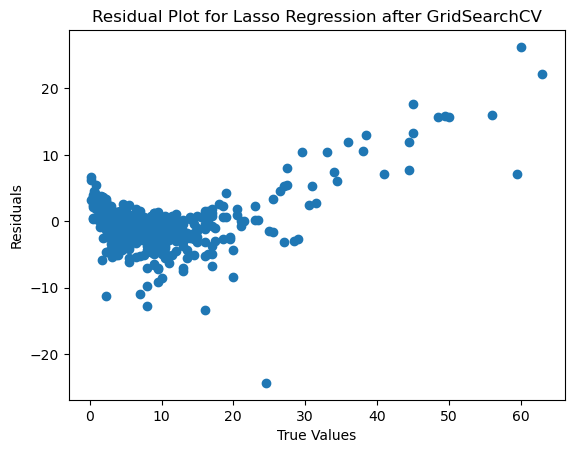

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# Parameter grid for GridSearchCV
param_grid = {'alpha': np.logspace(-4, 0, 50)}  # Search over alpha values from 1e-4 to 1

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_lasso = grid_search.best_estimator_

# Make predictions with the best model
y_train_pred = best_lasso.predict(X_train)
y_val_pred = best_lasso.predict(X_val)
y_test_pred = best_lasso.predict(X_test)

# Evaluate the model
print("Model evaluation for Lasso regression after GridSearchCV")

# Compute R2 score
train_score_r2 = r2_score(y_train, y_train_pred)
val_score_r2 = r2_score(y_val, y_val_pred)
test_score_r2 = r2_score(y_test, y_test_pred)
cv_score = cross_val_score(best_lasso, X_val, y_val, cv=5)

# Compute MSE
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Score Train R2: {train_score_r2}, Score Validation R2: {val_score_r2}, Score Test R2: {test_score_r2}")
print(f"Cross Validation Score: {cv_score}, Mean of Cross Validation Score: {cv_score.mean()}")
print(f"Train MSE: {train_mse}, Validation MSE: {val_mse}, Test MSE: {test_mse}")

# Residual plot 
plt.scatter(y_test.values.ravel(), y_test.values.ravel() - y_test_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Lasso Regression after GridSearchCV')
plt.show()
